## Example to load the network, sample 4 levels at random from the latent space and then plot them using matplotlib.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
!ls

all_levels_onehot.npz		   __pycache__	     train_vae.py
example_sampling_random_levels.py  readme.md	     vae_mario.py
models				   requirements.txt
plotting_utilities.py		   sprites


In [14]:
#!cp 'path/to/file' 'path/to/drive'

In [15]:
import os
os.chdir("exercise_DL_pcg")

FileNotFoundError: ignored

In [16]:
!ls

all_levels_onehot.npz		   __pycache__	     train_vae.py
example_sampling_random_levels.py  readme.md	     vae_mario.py
models				   requirements.txt
plotting_utilities.py		   sprites


In [17]:
import os
import torch
import matplotlib.pyplot as plt

from vae_mario import VAEMario
from plotting_utilities import plot_decoded_level

In [9]:
# Loading the model
model_name = "mario_vae_zdim_2_overfitted"
z_dim = 2
vae = VAEMario(z_dim=z_dim)
vae.load_state_dict(torch.load(f"./models/{model_name}.pt"))


VAEMario(
  (encoder): Sequential(
    (0): Linear(in_features=2156, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
  )
  (fc_mu): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (fc_var): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=2156, bias=True)
  )
)


<All keys matched successfully>

In [84]:
# Sampling random zs
zs = 2.5 * torch.randn((4, z_dim))
levels = vae.decode(zs)
level_1 = levels[0]
target = torch.argmax(level_1, dim=0)
target


tensor([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 7, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 9, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 9, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 9, 2, 2, 2],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [94]:

z = torch.randn(z_dim)
levels = list(map(vae.decode, zs))
#loss = lambda level: torch.mean((target - level) **2)
loss = lambda level: torch.mean((target - level) **2).detach().item()
#list(map(loss, levels)))
#list(map(round, map(loss, levels)))
torch.argmin(torch.tensor(list(map(loss, levels))))


tensor(1)

In [85]:
z = torch.randn(z_dim)

output = torch.argmax(vae.decode(z)[0], dim=0)

(output == target).int()
zs = [z + 0.1 * torch.randn(2) for z in range(10)]
z2 = zs[0]
#output2 = torch.argmax(vae.decode(zs[0]), dim=0)
output2 = torch.argmax(vae.decode(z2)[0], dim=0)
#output2
#(output2 == target).int()

#mapped map(vae.decode, zs)


#output2

In [95]:
# Sampling random zs
zs = 2.5 * torch.randn((4, z_dim))
levels = vae.decode(zs)
level_1 = levels[0]
target = torch.argmax(level_1, dim=0)
#target
torch.argmax(vae.decode(zs)[0], dim=0)


tensor([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0]])

In [97]:
# Getting levels from them using the decoder
levels = vae.decode(zs)
# print(levels.shape)
level_imgs = [plot_decoded_level(level) for level in levels]


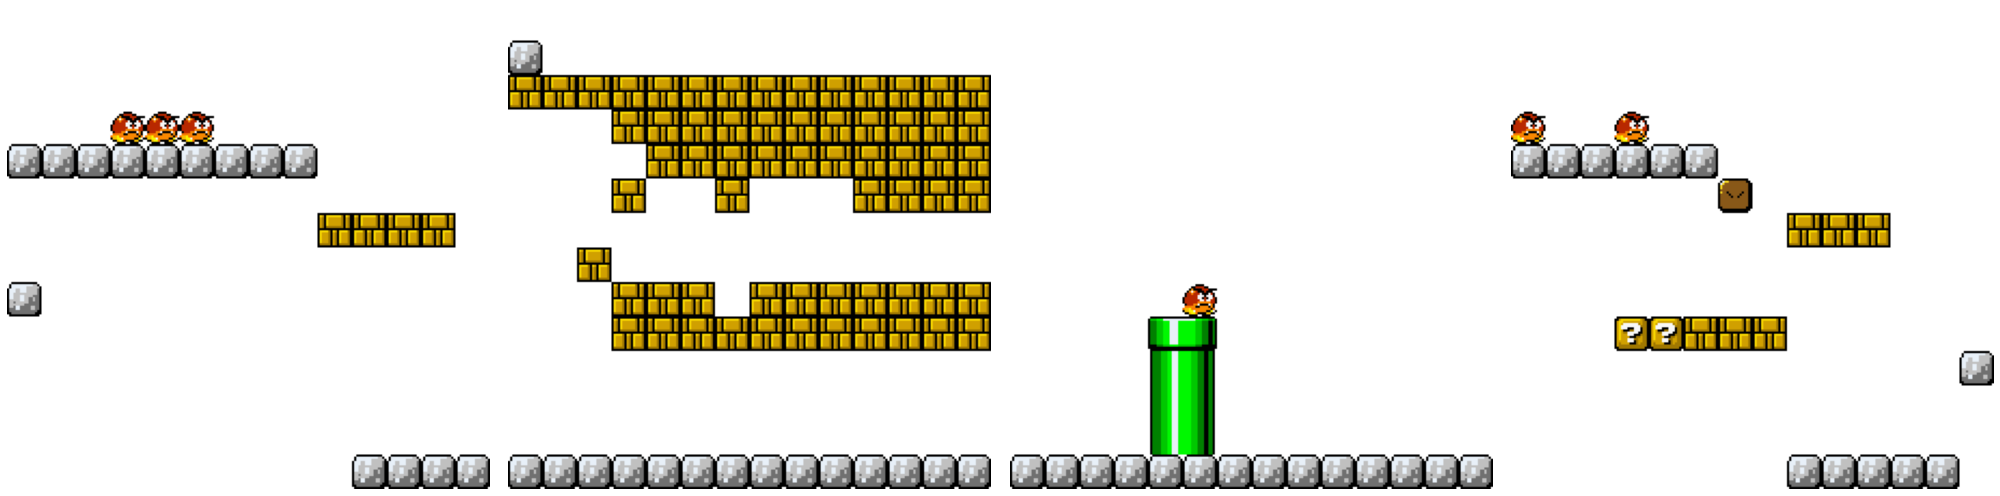

In [98]:
# Plotting
_, axes = plt.subplots(1, 4, figsize=(7 * 4, 7))
for level_img, ax in zip(level_imgs, axes):
    ax.imshow(level_img)
    ax.axis("off")

plt.tight_layout()
plt.show()


VAEMario(
  (encoder): Sequential(
    (0): Linear(in_features=2156, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
  )
  (fc_mu): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (fc_var): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=2156, bias=True)
  )
)


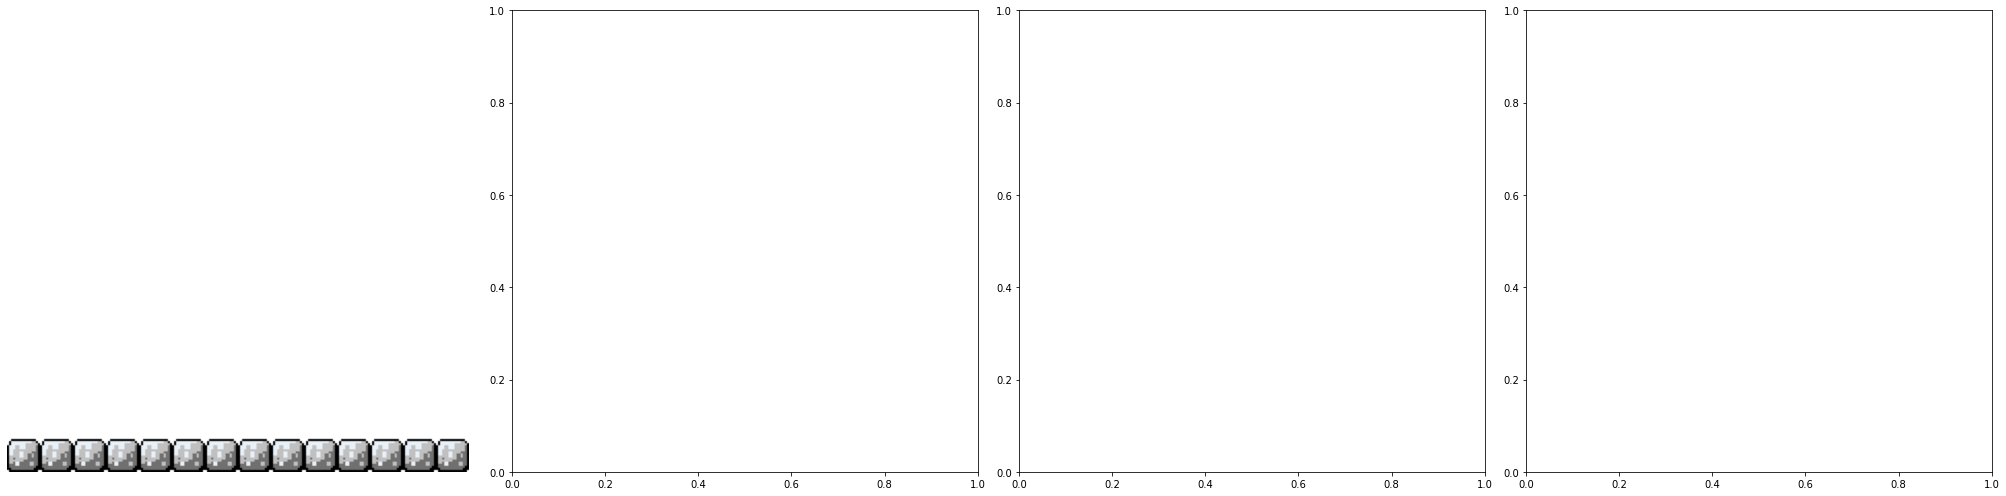

[tensor([-0.0443, -0.1217]),
 tensor([1.0557, 0.8642]),
 tensor([2.0642, 1.9338]),
 tensor([3.0744, 3.0195]),
 tensor([3.9928, 4.0338]),
 tensor([4.9285, 4.9859]),
 tensor([6.0362, 5.8443]),
 tensor([7.1254, 7.0421]),
 tensor([7.9418, 8.0736]),
 tensor([8.9656, 8.9737])]

In [83]:
import os
import torch
import matplotlib.pyplot as plt

from vae_mario import VAEMario
from plotting_utilities import plot_decoded_level

# Loading the model
model_name = "mario_vae_zdim_2_overfitted"
z_dim = 2
vae = VAEMario(z_dim=z_dim)
vae.load_state_dict(torch.load(f"./models/{model_name}.pt"))

#target




# Sampling random zs
zs = 2.5 * torch.randn((4, z_dim))
levels = vae.decode(zs)
level_1 = levels[0]
target = torch.argmax(level_1, dim=0)
target

z = torch.randn(z_dim)

output = torch.argmax(vae.decode(z)[0], dim=0)

(output == target).int()
zs = [z + 0.1 * torch.randn(2) for z in range(10)]
z2 = zs[0]

#output2 = torch.argmax(vae.decode(zs[0]), dim=0)
output2 = torch.argmax(vae.decode(z2)[0], dim=0)
#output2
(output2 == target).int()

# Getting levels from them using the decoder
levels = vae.decode(z2)
# print(levels.shape)
level_imgs = [plot_decoded_level(level) for level in levels]


# Plotting
_, axes = plt.subplots(1, 4, figsize=(7 * 4, 7))
for level_img, ax in zip(level_imgs, axes):
    ax.imshow(level_img)
    ax.axis("off")

plt.tight_layout()
plt.show()

zs



# Latent Variable Evolution Lab


## Sample from the VAE and then implement some search algorithm of choise to search the latent space for a particular level (e.g. one with many ground tiles)